In [2]:
import numpy as np
import pandas as pd

In [129]:
movies = pd.read_csv('imdb-top-1000.csv')

In [130]:
movies.head()

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
0,300,2006,117,Action,7.6,Zack Snyder,Gerard Butler,732876,210614939,52.0
1,1917,2019,119,Drama,8.3,Sam Mendes,Dean-Charles Chapman,425844,159227644,78.0
2,(500) Days of Summer,2009,95,Comedy,7.7,Marc Webb,Zooey Deschanel,472242,32391374,76.0
3,12 Angry Men,1957,96,Crime,9.0,Sidney Lumet,Henry Fonda,689845,4360000,96.0
4,12 Years a Slave,2013,134,Biography,8.1,Steve McQueen,Chiwetel Ejiofor,640533,56671993,96.0


### Groupby
- Applied in catagorical columns

In [131]:
genres = movies.groupby('Genre')

In [132]:
#Applying builtin aggregation function on groupby object
genres.sum()

In [133]:
#Find the top3 genres by total earnings
movies.groupby('Genre').sum()['Gross'].sort_values(ascending = False).head(3)

In [134]:
movies.groupby('Genre')['Gross'].sum().sort_values(ascending = False).head(3)

In [135]:
#Find the genre with highest avg IMDB ratings
movies.groupby('Genre')['IMDB_Rating'].mean().sort_values(ascending = False).head(1)

In [136]:
#Find director with most popularity
movies.groupby('Director')['No_of_Votes'].sum().sort_values(ascending = False).head(1)

In [137]:
#find the highest rated movies of each genre
movies.groupby('Genre')['IMDB_Rating'].max()

In [138]:
#find number of movies done be each actor
# movies['Star1'].value_counts()
movies.groupby('Star1')['Series_Title'].count().sort_values(ascending = False)

In [139]:
# find total number of groups formed by using groupby
len(movies.groupby('Genre'))

In [140]:
movies['Genre'].nunique()

In [141]:
movies.groupby("Genre").size()
# movies['Genre'].value_counts

In [142]:
genre = movies.groupby('Genre')

In [143]:
genre.first()
# genre.last()
# genre = s.nth(6)
# for fetching the 7th movies we have taken 6 because index starts from 0'''

In [144]:
# get_group -> filtering
genres.get_group('Horror')
# movies[movies['Genre']=='Horror']

In [145]:
genres.groups

In [146]:
genres.describe()

In [147]:
genres.sample(4, replace = True)
# we use replace here so that  it doesn't throw error when all movi

In [148]:
genres.nunique()
# no use of unique

In [149]:
# agg method(min,max,sum)
# passing dict
genres.agg(
    {
        'Runtime': 'mean',
        'IMDB_Rating': ['mean','sum'],
        'No_of_Votes': 'sum',
        'Gross': 'sum'
    
})

In [150]:
genres.agg(['min','max','mean','sum'])

In [151]:
#Looping in groups
for group,data in genres:
    print(data)

In [152]:
import warnings
warnings.filterwarnings('ignore')

In [153]:
# finding highest rated movies in each genres
#Creating an empty dataset to store the value
df = pd.DataFrame(columns=movies.columns)
for group,data in genres:
    df = df.append(data[data['IMDB_Rating']== data['IMDB_Rating'].max()])
df

## Apply

In [154]:
#find number of movies starting with A for each group

# genres.apply(min)

def val(group):
    return group['Series_Title'].str.startswith('A').sum()



In [155]:
genres.apply(val)

In [156]:
# find ranking of each movie in the group according to IMDB score
def rank_movie(group):
    group['genre_rank'] = group['IMDB_Rating'].rank(ascending= False)
    return group

In [157]:
#finding rank of each movie in the group according to IMDB score
genres.apply(rank_movie)

In [158]:
#find normalized rating for each group

def normal(group):
    group['normal_rating'] = (group['IMDB_Rating'] - group['IMDB_Rating'].min()) / (group['IMDB_Rating'].max() - group['IMDB_Rating'].min())
    return group

# Make sure genres is a DataFrame before applying groupby
genres = genres.groupby('Genre').apply(normal)


In [ ]:
#groupby on  multiple columns
duo = movies.groupby(['Director','Star1'])
duo

#size
duo.size()
#get group
duo.get_group(('Aamir Khan','Amole Gupte'))

In [ ]:
#find the most earning actor -> director combo
duo['Gross'].sum().sort_values(ascending = False).head(1)

In [ ]:
#find the best(in terms of mastarcore(avg)) actor->genre combo
movies.groupby(['Star1','Genre'])['Metascore'].mean().reset_index().sort_values('Metascore', ascending = False)

In [ ]:
# agg to multiple groupby
duo.agg(['min','max','mean'])

## Exercise

In [ ]:
ipl1 = pd.read_csv('deliveries.csv')

In [ ]:
ipl1.head()

In [ ]:
ipl1.shape

In [ ]:
ipl1.size

In [ ]:
# find the top ten batsman in terms of run
ipl1.groupby('batsman')['batsman_runs'].sum().sort_values(ascending= False).head(10)

In [ ]:
#find the batsman with most number of runs
six = ipl1[ipl1['batsman_runs'] == 6]
six.groupby('batsman')['batsman'].count().sort_values(ascending = False).head(1)#index[0]

In [ ]:
# find the batsman with most number of 4's and 6's in last 5 overs
temp_df = ipl1[ipl1['over']>15]
temp_df = temp_df[(temp_df['batsman_runs'] == 4) | (temp_df['batsman_runs']==6)]
temp_df.groupby('batsman')['batsman'].count().sort_values(ascending = False).head(1).index[0]

In [ ]:
#find V kohli record against all teams
temp = ipl1[ipl1['batsman']=='V Kohli']
temp.groupby('bowling_team')['batsman_runs'].sum()

In [ ]:
# #create a function that can return the highest score of any batsman
temp2 = ipl1[ipl1['batsman']=='V Kohli']
temp2.groupby('match_id')['batsman_runs'].sum().sort_values(ascending=False).head(1).values[0]

In [ ]:
def highest_runs(batsman):
    temp2 = ipl1[ipl1['batsman']== batsman]
    return temp2.groupby('match_id')['batsman_runs'].sum().sort_values(ascending=False).head(1).values[0]
    
    

In [ ]:
highest_runs('MS Dhoni')

In [3]:
courses = pd.read_csv('courses.csv')
students = pd.read_csv('students.csv')
nov = pd.read_csv('reg-month1.csv')
dec = pd.read_csv('reg-month2.csv')
matches = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

In [4]:
dec.shape

(28, 2)

### pd.concat
### df.concat
### ignore_index
### df.append
### multiidex -> ftch using iloc
### concat dataframes horizontally

In [5]:
regs = pd.concat([nov,dec], ignore_index =True)
regs

,student_id,course_id
0,23,1
1,15,5
2,18,6
3,23,4
4,16,9
5,18,1
6,1,1
7,7,8
8,22,3
9,15,1


In [6]:
nov.append(dec, ignore_index = True)

C:\Users\rahul\AppData\Local\Temp\ipykernel_17820\843376417.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  nov.append(dec, ignore_index = True)


,student_id,course_id
0,23,1
1,15,5
2,18,6
3,23,4
4,16,9
5,18,1
6,1,1
7,7,8
8,22,3
9,15,1


In [7]:
multi = pd.concat([nov,dec], keys = ['Nov','Dec'])
#multiindex Dataframe
#indexing
multi.loc['Nov',0]

student_id    23
course_id      1
Name: (Nov, 0), dtype: int64

In [11]:
pd.concat([nov,dec], axis = 1)

,student_id,course_id,student_id,course_id
0,23.0,1.0,3,5
1,15.0,5.0,16,7
2,18.0,6.0,12,10
3,23.0,4.0,12,1
4,16.0,9.0,14,9
5,18.0,1.0,7,7
6,1.0,1.0,7,2
7,7.0,8.0,16,3
8,22.0,3.0,17,10
9,15.0,1.0,11,8


## Merging
- Innerjoin
- leftjoin
- rightjoin
- outerjoin

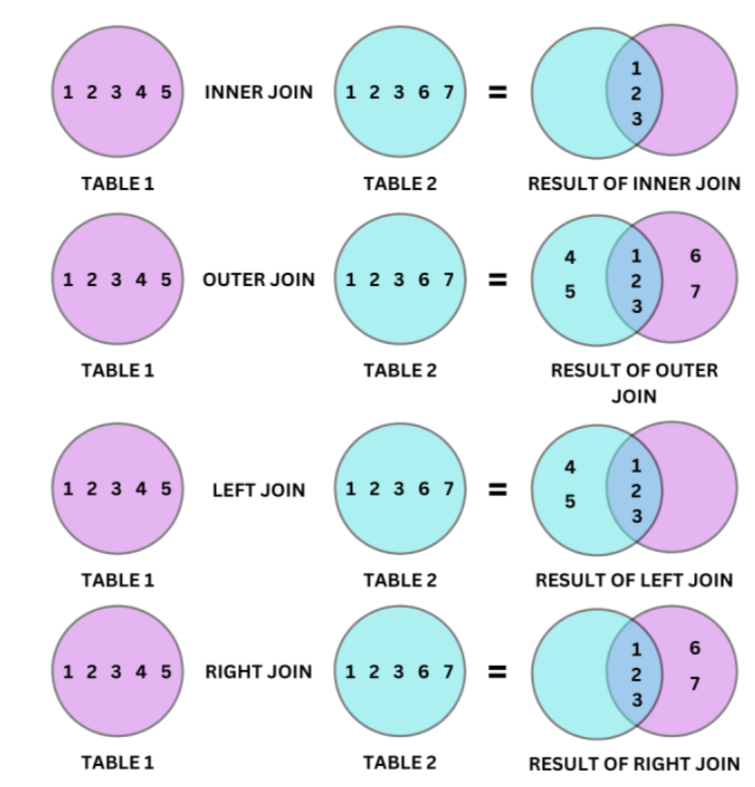

In [12]:
regs

,student_id,course_id
0,23,1
1,15,5
2,18,6
3,23,4
4,16,9
5,18,1
6,1,1
7,7,8
8,22,3
9,15,1


In [9]:
#inner join
students.merge(regs, how = 'inner', on = 'student_id')
# on:- on bases of which column we are joining

,student_id,name,partner,course_id
0,1,Kailash Harjo,23,1
1,1,Kailash Harjo,23,6
2,1,Kailash Harjo,23,10
3,1,Kailash Harjo,23,9
4,2,Esha Butala,1,5
5,3,Parveen Bhalla,3,3
6,3,Parveen Bhalla,3,5
7,7,Tarun Thaker,9,8
8,7,Tarun Thaker,9,10
9,7,Tarun Thaker,9,7


In [14]:
#left join
courses.merge(regs, how='left', on = 'course_id')

,course_id,course_name,price,student_id
0,1,python,2499,23.0
1,1,python,2499,18.0
2,1,python,2499,1.0
3,1,python,2499,15.0
4,1,python,2499,21.0
5,1,python,2499,25.0
6,1,python,2499,12.0
7,1,python,2499,14.0
8,1,python,2499,38.0
9,2,sql,3499,19.0


In [64]:
#right join
temp_df = pd.DataFrame({
    'student_id': [26,54,16,22],
    'name': ['Raju','Rahul','Vivek','Ankit'],
    'partner_id': [22,16,54,26]
    
})
students = pd.concat([students, temp_df], ignore_index = True)

In [18]:
students.tail()

,student_id,name,partner
24,25,Shashank D’Alia,2
25,26,Raju,28
26,54,Rahul,69
27,16,Vivek,15
28,22,Ankit,44


In [20]:
students.merge(regs, how = 'right', on = 'student_id')

,student_id,name,partner,course_id
0,23,Chhavi Lachman,18.0,1
1,15,Preet Sha,16.0,5
2,18,Fardeen Mahabir,13.0,6
3,23,Chhavi Lachman,18.0,4
4,16,Elias Dodiya,25.0,9
5,16,Vivek,15.0,9
6,18,Fardeen Mahabir,13.0,1
7,1,Kailash Harjo,23.0,1
8,7,Tarun Thaker,9.0,8
9,22,Yash Sethi,21.0,3


In [24]:
#outerjoin
students.merge(regs,how = 'outer', on = 'student_id').tail(10)

,student_id,name,partner,course_id
59,23,Chhavi Lachman,18.0,9.0
60,23,Chhavi Lachman,18.0,5.0
61,24,Radhika Suri,17.0,4.0
62,25,Shashank D’Alia,2.0,1.0
63,25,Shashank D’Alia,2.0,10.0
64,26,Raju,28.0,NaN
65,54,Rahul,69.0,NaN
66,42,NaN,NaN,9.0
67,50,NaN,NaN,8.0
68,38,NaN,NaN,1.0


In [30]:
# 1. find total revenue generated
total_rev = regs.merge(courses, how = 'inner', on ='course_id')['price'].sum()
total_rev

154247

In [32]:
#find month by month revenue
temp_df = pd.concat([nov,dec], keys=['Nov', 'Dec']).reset_index()
temp_df.merge(courses, on='course_id').groupby('level_0')['price'].sum()

level_0
Dec    65072
Nov    89175
Name: price, dtype: int64

In [38]:
# print the registration table
# cols -> name -> course -> price
regs.merge(students, on = 'student_id').merge(courses, on = 'course_id')[['name','course_name', 'price']]

,name,course_name,price
0,Chhavi Lachman,python,2499
1,Preet Sha,python,2499
2,Fardeen Mahabir,python,2499
3,Kailash Harjo,python,2499
4,Seema Kota,python,2499
5,Shashank D’Alia,python,2499
6,Radha Dutt,python,2499
7,Pranab Natarajan,python,2499
8,Chhavi Lachman,machine learning,9999
9,Qabeel Raman,machine learning,9999


<Axes: xlabel='course_name'>

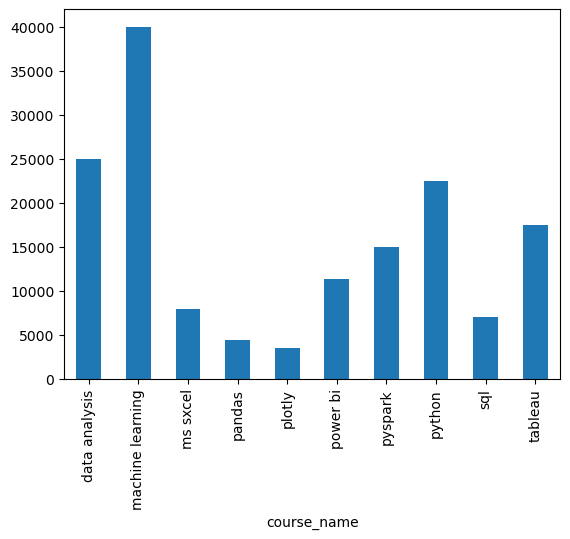

In [40]:
# find bar chart for revenue/course
regs.merge(courses, on ='course_id').groupby('course_name')['price'].sum().plot(kind = 'bar')

In [50]:
#find students who enrolled in both the courses
common_students_id = np.intersect1d(nov['student_id'], dec['student_id'])
common_students_id
# Filter students who are in both courses

#common_students = nov[nov['student_id'].isin(dec['student_id'])]
# print(common_students)


array([ 1,  3,  7, 11, 16, 17, 18, 22, 23], dtype=int64)

In [53]:
students[students['student_id'].isin(common_students_id)]

,student_id,name,partner
0,1,Kailash Harjo,23
2,3,Parveen Bhalla,3
6,7,Tarun Thaker,9
10,11,David Mukhopadhyay,20
15,16,Elias Dodiya,25
16,17,Yasmin Palan,7
17,18,Fardeen Mahabir,13
21,22,Yash Sethi,21
22,23,Chhavi Lachman,18
27,16,Vivek,15


In [57]:
# find course that got no enrolment
# courses['course_id']
# regs['course_id']
course_id_list = np.setdiff1d(courses['course_id'], regs['course_id'])
courses[courses['course_id'].isin(course_id_list)]

,course_id,course_name,price
10,11,Numpy,699
11,12,C++,1299


In [61]:
# iind syudents who did not enrolled in any courses
students_id_list = np.setdiff1d(students['student_id'], regs['student_id'])
students[students['student_id'].isin(students_id_list)].shape[0]
(10/28)*100

35.714285714285715

## Self join

In [65]:
# create a table and get student with parther id
students.merge(students, how='inner',left_on ='partner_id',right_on='student_id' )
#left_on:- is for outer students
# right_on:- is for inner students

,student_id_x,name_x,partner_x,partner_id_x,student_id_y,name_y,partner_y,partner_id_y
0,26,Raju,NaN,22.0,22,Yash Sethi,21.0,NaN
1,26,Raju,NaN,22.0,22,Ankit,44.0,NaN
2,26,Raju,NaN,22.0,22,Ankit,NaN,26.0
3,54,Rahul,NaN,16.0,16,Elias Dodiya,25.0,NaN
4,54,Rahul,NaN,16.0,16,Vivek,15.0,NaN
5,54,Rahul,NaN,16.0,16,Vivek,NaN,54.0
6,16,Vivek,NaN,54.0,54,Rahul,69.0,NaN
7,16,Vivek,NaN,54.0,54,Rahul,NaN,16.0
8,22,Ankit,NaN,26.0,26,Raju,28.0,NaN
9,22,Ankit,NaN,26.0,26,Raju,NaN,22.0


In [67]:
students.merge(students, how='inner',left_on ='partner_id',right_on='student_id' )[['name_x','name_y']]


,name_x,name_y
0,Raju,Yash Sethi
1,Raju,Ankit
2,Raju,Ankit
3,Rahul,Elias Dodiya
4,Rahul,Vivek
5,Rahul,Vivek
6,Vivek,Rahul
7,Vivek,Rahul
8,Ankit,Raju
9,Ankit,Raju


In [74]:
# find top 3 studdents who did most number enrolment
regs.merge(students, on = 'student_id').groupby(['student_id', 'name'])['name'].count().sort_values(ascending = False).head(3)

student_id  name          
16          Vivek             8
23          Chhavi Lachman    6
22          Ankit             6
Name: name, dtype: int64

In [75]:
# find top 3 students who spend most amount of money on courses
regs.merge(students, on = 'student_id').merge(courses, on = 'course_id').groupby(['student_id', 'name'])['price'].sum().sort_values(ascending = False).head(3)

student_id  name          
23          Chhavi Lachman    22594
16          Vivek             19592
22          Ankit             18794
Name: price, dtype: int64

## IPL problem


In [76]:
#Find the top 3 stadiums with highest sixes/match 
matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


In [77]:
delivery

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [79]:
temp_df = delivery.merge(matches, left_on = 'match_id', right_on = 'id' )

In [80]:
six_df = temp_df[temp_df['batsman_runs'] == 6]

In [81]:
#sixes/stadium
num_sixes = six_df.groupby('venue')['venue'].count()

In [82]:
num_matches = matches['venue'].value_counts()

In [83]:
(num_sixes/num_matches).sort_values(ascending = False).head(3)

Holkar Cricket Stadium     17.600000
M Chinnaswamy Stadium      13.227273
Sharjah Cricket Stadium    12.666667
Name: venue, dtype: float64

In [87]:
#find orange cap holder of all the season
temp_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,0,...,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN
150456,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,0,...,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN
150457,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,...,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN
150458,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,...,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN


In [98]:
temp_df.groupby(['season','batsman'])['batsman_runs'].sum().reset_index().sort_values('batsman_runs',ascending=False).drop_duplicates(subset=['season'],keep='first').sort_values('season')

,season,batsman,batsman_runs
115,2008,SE Marsh,616
229,2009,ML Hayden,572
446,2010,SR Tendulkar,618
502,2011,CH Gayle,608
684,2012,CH Gayle,733
910,2013,MEK Hussey,733
1088,2014,RV Uthappa,660
1148,2015,DA Warner,562
1383,2016,V Kohli,973
1422,2017,DA Warner,641
